# Validation

This notebook contains examples of the simulations that have been used to validate Disimpy's functionality by comparing the simulated signals against analytical solutions. Here, we focus on the monoexponential signal decay in the case of free diffusion and on the signal minimum in the case of restricted diffusion inside cylinders perpendicular to the diffusion encoding gradient.

In [2]:
# Import the required packages and modules

import numpy as np
import matplotlib.pyplot as plt

from disimpy import gradients, simulations

In [6]:
# Define the simulation parameters

n_s = int(1e6)  # Number of random walkers
n_t = int(1e4)  # Number of time points in the simulation
diffusivity = 2e-9  # In SI units (m^2/s)

## Free diffusion

Starting simulation.
Step length = 2.4519429128950357e-07
Number of spins = 1000000
Number of steps = 10000
Simulation finished.


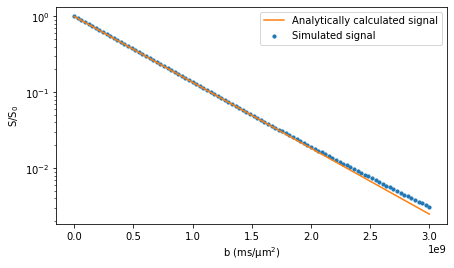

In [7]:
# Create a Stejskal-Tanner gradient array with ∆ = 40 ms and δ = 10 ms

T = 50e-3
gradient = np.zeros((1, 500, 3))
gradient[0, 1:100, 0] = 1
gradient[0, -100:-1, 0] = -1
bs = np.linspace(1, 3e9, 100)
gradient = np.concatenate([gradient for _ in bs], axis=0)
dt = T / (gradient.shape[1] - 1)
gradient, dt = gradients.interpolate_gradient(gradient, dt, n_t)
gradient = gradients.set_b(gradient, dt, bs)


# Run the simulation

substrate = {'type' : 'free'}
signals = simulations.simulation(n_s, diffusivity, gradient, dt, substrate)


# Plot the results and the analytical solution

fig, ax = plt.subplots(1, figsize=(7, 4))
ax.plot(bs, np.exp(-bs * diffusivity), color='tab:orange')
ax.scatter(bs, signals / n_s, s=10, marker='o')
ax.legend(['Analytically calculated signal', 'Simulated signal'])
ax.set_xlabel('b (ms/μm$^2$)')
ax.set_ylabel('S/S$_0$')
ax.set_yscale('log')
plt.show()

## Restricted diffusion in cylinders

Starting simulation.
Step length = 7.754096504510382e-07
Number of spins = 1000000
Number of steps = 10000
Simulation finished.


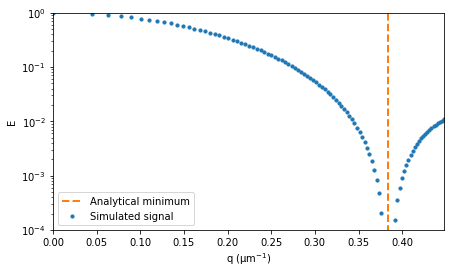

In [9]:
# Create a Stejskal-Tanner gradient array with ∆ = 0.5 s and δ = 1 ms

T = 501e-3
gradient = np.zeros((1, n_t, 3))
gradient[0, 1:20, 0] = 1
gradient[0, -20:-1, 0] = -1
bs = np.linspace(1, 1e11, 100)
dt = T / (gradient.shape[1] - 1)
bs = np.linspace(1, 1e11, 100)
gradient = np.concatenate([gradient for _ in bs], axis=0)
gradient = gradients.set_b(gradient, dt, bs)
q = gradients.calc_q(gradient, dt)
qs = np.max(np.linalg.norm(q, axis=2), axis=1)


# Run the simulation

radius = 10e-6
substrate = {'type' : 'cylinder',
             'orientation' : np.array([0, 0, 1.0]),
             'radius' : radius}
signals = simulations.simulation(n_s, diffusivity, gradient, dt, substrate)


# Plot the results and the analytical solution

fig, ax = plt.subplots(1, figsize=(7, 4))
ax.scatter(1e-6 * qs, signals / n_s, s=10, marker='o')
minimum = 1e-6 * .61 * 2 * np.pi / radius
ax.plot([minimum, minimum], [0, 1], ls='--', lw=2, color='tab:orange')
ax.legend(['Analytical minimum', 'Simulated signal'])
ax.set_xlabel('q (μm$^{-1}$)')
ax.set_ylabel('E')
ax.set_yscale('log')
ax.set_ylim([1e-4, 1])
ax.set_xlim([0, max(1e-6 * qs)])
plt.show()